In [1]:
import ROOT as rt
import os, sys
import json 
ERA = sys.argv[1]

# for dev
# ERA = "combine"

setting={}
with open('../../config/Settrain.json') as json_file: # ci
# with open('./config/Settrain.json') as json_file: # local test
    data = json.load(json_file)
    setting=data
SIGNAL_MASSES = setting["ALL_MASSES"]


def get_str_lumi_channel(era):
    str_lumi="137.64"
    str_channel="combined"
    if("mm" in era):
        str_channel="#mu#mu"          
    if("ee" in era):
        str_channel="ee"               
    if("em" in era):
        str_channel="e#mu"
    if "16" in era:
        str_lumi="37.33"                
    if "17" in era:
        str_lumi="41.48"
    if "18" in era:
        str_lumi="59.83"
    return str_channel, str_lumi

str_channel, str_lumi = get_str_lumi_channel(ERA)

str_lumi

Welcome to JupyROOT 6.30/02


'137.64'

In [ ]:
print(rt.__version__)
print(vars(rt.TGraph))

In [2]:
import numpy as np
from scipy.interpolate import Rbf, interp1d
import itertools
#from GChiPairs import gchipairs
import operator
import subprocess
def set_palette(name="default", ncontours=255):
    # For the canvas:
    rt.gStyle.SetCanvasBorderMode(0)
    rt.gStyle.SetCanvasColor(rt.kWhite)
    rt.gStyle.SetCanvasDefH(400) #Height of canvas
    rt.gStyle.SetCanvasDefW(500) #Width of canvas
    rt.gStyle.SetCanvasDefX(0)   #POsition on screen
    rt.gStyle.SetCanvasDefY(0)
    
    # For the Pad:
    rt.gStyle.SetPadBorderMode(0)
    # rt.gStyle.SetPadBorderSize(Width_t size = 1)
    rt.gStyle.SetPadColor(rt.kWhite)
    rt.gStyle.SetPadGridX(False)
    rt.gStyle.SetPadGridY(False)
    rt.gStyle.SetGridColor(0)
    rt.gStyle.SetGridStyle(3)
    rt.gStyle.SetGridWidth(1)
    
    # For the frame:
    rt.gStyle.SetFrameBorderMode(0)
    rt.gStyle.SetFrameBorderSize(1)
    rt.gStyle.SetFrameFillColor(0)
    rt.gStyle.SetFrameFillStyle(0)
    rt.gStyle.SetFrameLineColor(1)
    rt.gStyle.SetFrameLineStyle(1)
    rt.gStyle.SetFrameLineWidth(1)
    
    # set the paper & margin sizes
    rt.gStyle.SetPaperSize(20,26)
    rt.gStyle.SetPadTopMargin(0.085)
    rt.gStyle.SetPadRightMargin(0.15)
    rt.gStyle.SetPadBottomMargin(0.15)
    rt.gStyle.SetPadLeftMargin(0.17)
    
    # use large Times-Roman fonts
    rt.gStyle.SetTitleFont(42,"xyz")  # set the all 3 axes title font
    rt.gStyle.SetTitleFont(42," ")    # set the pad title font
    rt.gStyle.SetTitleSize(0.06,"xyz") # set the 3 axes title size
    rt.gStyle.SetTitleSize(0.06," ")   # set the pad title size
    rt.gStyle.SetLabelFont(42,"xyz")
    rt.gStyle.SetLabelSize(0.05,"xyz")
    rt.gStyle.SetLabelColor(1,"xyz")
    rt.gStyle.SetTextFont(42)
    rt.gStyle.SetTextSize(0.08)
    rt.gStyle.SetStatFont(42)
    
    # use bold lines and markers
    rt.gStyle.SetMarkerStyle(8)
    #rt.gStyle.SetHistLineWidth(1.85)
    rt.gStyle.SetLineStyleString(2,"[12 12]") # postscript dashes
    
    #..Get rid of X error bars
    rt.gStyle.SetErrorX(0.001)
    
    # do not display any of the standard histogram decorations
    rt.gStyle.SetOptTitle(1)
    rt.gStyle.SetOptStat(0)
    #rt.gStyle.SetOptFit(11111111)
    rt.gStyle.SetOptFit(0)
    
    # put tick marks on top and RHS of plots
    rt.gStyle.SetPadTickX(1)
    rt.gStyle.SetPadTickY(1)
    # default palette, looks cool
    stops = [0.00, 0.34, 0.61, 0.84, 1.00]
    red   = [0.00, 0.00, 0.87, 1.00, 0.51]
    green = [0.00, 0.81, 1.00, 0.20, 0.00]
    blue  = [0.51, 1.00, 0.12, 0.00, 0.00]
    #from PlotsSMS/python/smsPlotXSEC.py
    stops = [0.00, 0.20, 0.70, 0.90, 1.00]
    red   = [0.00, 0.00, 1.00, 1.00, 1.00]
    green = [0.00, 1.00, 1.00, 0.30, 0.00]
    blue  = [1.00, 1.00, 0.00, 0.20, 0.00]

    s = array('d', stops)
    r = array('d', red)
    g = array('d', green)
    b = array('d', blue)
    
    npoints = len(s)
    rt.TColor.CreateGradientColorTable(npoints, s, r, g, b, ncontours)
    rt.gStyle.SetNumberContours(ncontours)   



In [3]:
# get limits
dic_limits={}
# with open('Combine/limits_'+channel+'.json') as json_file:
# with open('Combine/limits_shadow.json') as json_file:
# with open('Combine/limits_v1_mm17_0116withwnb0.json') as json_file:
# with open('Combine/limits_v1_mm17_0117withwnb0_loadscaler.json') as json_file:
# with open('Combine/limits_v1_mm17_1003.json') as json_file:
# with open('Combine/limits_v1_mm17_2103_beq0_wsys.json') as json_file:
# with open('Combine/Logs_v1/limits_v2Allcombine.json') as json_file:
# with open('Combine/Logs_v1/limits_v3.json') as json_file:
# with open('/eos/user/h/hkwon/Run2/Preselection/20231214GEv1/LIMITbak2/ee16/limits_ee16.json') as json_file:
with open('LIMIT/'+ERA+'/Logs_v1/limits_'+ERA+'.json') as json_file:
    data = json.load(json_file)
    dic_limits=data
dic_limits


{'Zp-2900_CH-845': ['0.9283', '1.2518', '1.7734', '2.5298', '3.4804'],
 'Zp-3700_CH-845': ['4.4656', '6.0220', '8.5312', '12.2039', '16.7655'],
 'Zp-3300_CH-345': ['2.7072', '3.6507', '5.1719', '7.3777', '10.1499'],
 'Zp-4100_CH-1595': ['8.1460', '10.9851', '15.5625', '22.3241', '30.8199'],
 'Zp-4100_CH-1345': ['8.3423', '11.2498', '15.9375', '22.7985', '31.4204'],
 'Zp-2500_CH-345': ['0.6839', '0.9233', '1.2969', '1.8500', '2.5288'],
 'Zp-4100_CH-845': ['9.7490', '13.1469', '18.6250', '26.6429', '36.6015'],
 'Zp-2900_CH-1345': ['0.7749', '1.0450', '1.4805', '2.1119', '2.9055'],
 'Zp-2500_CH-845': ['0.4182', '0.5616', '0.7930', '1.1343', '1.5583'],
 'Zp-3300_CH-1595': ['1.6685', '2.2500', '3.1875', '4.5724', '6.2925'],
 'Zp-3300_CH-1345': ['1.7584', '2.3713', '3.3594', '4.7922', '6.5928'],
 'Zp-3700_CH-1595': ['3.7786', '5.0955', '7.2188', '10.3551', '14.2960'],
 'Zp-2100_CH-345': ['0.3403', '0.4553', '0.6406', '0.9087', '1.2376'],
 'Zp-3300_CH-1095': ['1.8893', '2.5478', '3.6094', '5.

In [4]:
# dic_limits["Zp-3300_CH-845"] = ['5', '7', '8', '9', '10']
missing = []
for m in SIGNAL_MASSES:
    found = False
    for k in dic_limits:
        if k==m and dic_limits[k]!=[]:
            found = True
    if found==False:
        print('missing '+m)
        missing.append(m)

for m in missing:
    dic_limits[m] = ['0', '0', '0', '0', '0']

In [5]:
# get x-sec
dic_xsec={}
with open('../../config/CrossSection.json') as json_file:
# with open('./config/CrossSection.json') as json_file:
    data = json.load(json_file)
    dic_xsec=data
print(dic_xsec)

{'Data': 1, 'DY': 6077.22, 'DY100To200': 254.2, 'DY200To500': 8.911, 'DY500To700': 0.2558, 'DY700To800': 0.04023, 'DY800To1000': 0.03406, 'DY1000To1500': 0.01828, 'DY1500To2000': 0.002367, 'DY2000To3000': 0.0005409, 'TT': 88.29, 'TTUp': 88.29, 'TTDown': 88.29, 'TThdampUp': 88.29, 'TThdampDown': 88.29, 'TTSemi': 365.34, 'TTZ': 0.2432, 'top': 34.91, 'antitop': 34.91, 'WW': 12.82, 'WZ': 5.23, 'WZQQ': 6.42, 'ZZ': 0.6008, 'WWW': 0.0072, 'WWZ': 0.1707, 'HWW': 0.31, 'H': 2.78, 'Zp-1700_CH-345': 0.03523, 'Zp-1700_CH-595': 0.03523, 'Zp-1700_CH-845': 0.03523, 'Zp-2100_CH-345': 0.01198, 'Zp-2100_CH-595': 0.01198, 'Zp-2100_CH-845': 0.01198, 'Zp-2500_CH-345': 0.004396, 'Zp-2500_CH-595': 0.004396, 'Zp-2500_CH-845': 0.004396, 'Zp-2500_CH-1095': 0.004396, 'Zp-2900_CH-345': 0.001768, 'Zp-2900_CH-595': 0.001768, 'Zp-2900_CH-845': 0.001768, 'Zp-2900_CH-1095': 0.001768, 'Zp-2900_CH-1345': 0.001768, 'Zp-3300_CH-345': 0.000729, 'Zp-3300_CH-595': 0.000729, 'Zp-3300_CH-845': 0.000729, 'Zp-3300_CH-1095': 0.000

# Get 1s.d contour

[<cppyy.gbl.TGraph object at 0x777b890>, <cppyy.gbl.TGraph object at 0xa8b4300>, <cppyy.gbl.TGraph object at 0xaafdaa0>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h2d (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h2d (Potential memory leak).


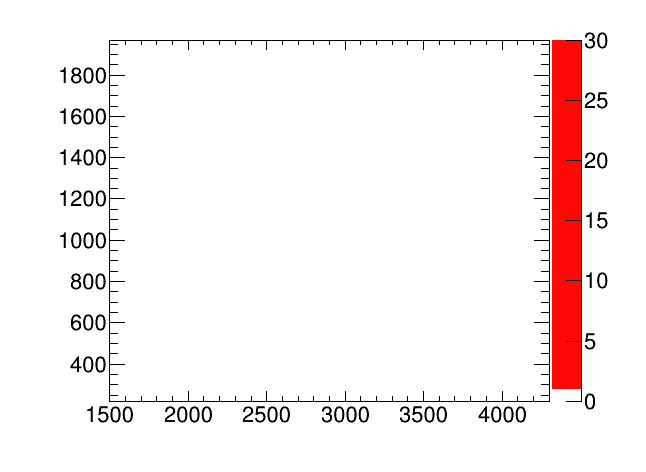

In [6]:
Zp_mass=[1700, 2100, 2500, 2900, 3300, 3700, 4100]
CH_mass=[345, 595, 845, 1095, 1345, 1595, 1845]
from array import *
rt.gROOT.SetBatch(rt.kTRUE)

index_1sd=[1,2,3]
list_graph=[]
for i in index_1sd:
    c=rt.TCanvas("c", "c", 650, 500)
    h2d=rt.TH2D("h2d", "", len(Zp_mass), Zp_mass[0]-200, Zp_mass[-1]+200, len(CH_mass), CH_mass[0]-125, CH_mass[-1]+125)

    for key in dic_limits:
        tmp=key.replace('_', '-')
        tmp=tmp.split('-')

        MZp=tmp[1]
        MCH=tmp[3]
        binx=Zp_mass.index(int(MZp))+1
        biny=CH_mass.index(int(MCH))+1
        h2d.SetBinContent(binx, biny, float(dic_limits[key][i]))

    set_palette("rainbow",255)
    rt.gStyle.SetOptStat(0)

    h2d.Draw("colz")
    contours = array('d',[1])
    h2d.SetContour(1,contours);
    h2d.Draw("CONT Z LIST")
    h2d.SetLineColor(rt.kBlack)
    c.Update()

    conts = rt.gROOT.GetListOfSpecials().FindObject("contours")
    contLevel = conts.At(0)
    curv = contLevel.First()
    gc = curv.Clone()
    
    list_graph.append(gc)

print(list_graph)


# 2D limit

Info in <TCanvas::Print>: pdf file LIMIT/Plots/limit_combine_v1.pdf has been created


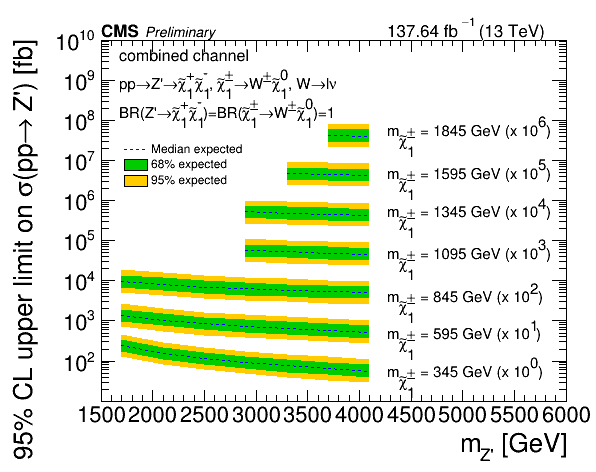

In [7]:
os.system("mkdir -p LIMIT/Plots")

c1=rt.TCanvas("c1", "c1", 650, 500)
c1.SetRightMargin(0.18)
h2d1=rt.TH2D("h2d1", "", len(Zp_mass), Zp_mass[0]-200, Zp_mass[-1]+200, len(CH_mass), CH_mass[0]-125, CH_mass[-1]+125)

for key in dic_limits:
    tmp=key.replace('_', '-')
    tmp=tmp.split('-')
    
    MZp=tmp[1]
    MCH=tmp[3]
    binx=Zp_mass.index(int(MZp))+1
    biny=CH_mass.index(int(MCH))+1
    h2d1.SetBinContent(binx, biny, float(dic_limits[key][2])*dic_xsec[key]*20*1000) # limit on production cross section
#     h2d1.SetBinContent(binx, biny, float(dic_limits[key][2])) # limit on signal strenth

# set_palette("rainbow",255)
rt.gStyle.SetOptStat(0)

h2d1.Draw("colz")
h2d1.SetYTitle("m_{#tilde#chi_{1}^{#pm}} [GeV]")
h2d1.SetXTitle("m_{Z'} [GeV]")
# h2d1.GetZaxis().SetRangeUser(0,630)
# contours = array('d',[1])
h2d1.DrawCopy("colz text");
# h2d1.SetContour(1,contours);
# # h2d1.Draw("cont3 same");
# h2d1.Draw("colz same");
# h2d1.SetLineColor(rt.kBlack);
# h2d1.SetLineWidth(2);

# h2d.GetYaxis().SetTitleOffset(1.25)
list_graph[0].Draw("same")
list_graph[0].SetLineStyle(4)
list_graph[0].SetLineWidth(2)
list_graph[0].SetLineColor(rt.kBlack)
list_graph[1].Draw("same")
list_graph[1].SetLineStyle(1)
list_graph[1].SetLineWidth(2)
list_graph[2].Draw("same")
list_graph[2].SetLineStyle(4)
list_graph[2].SetLineWidth(2)
list_graph[2].GetYaxis().SetTitle("erer")

l = rt.TLegend(0.2,0.55,0.4,0.65)
l.SetBorderSize(0);
l.AddEntry(list_graph[1], "Exp. median", "l")
l.AddEntry(list_graph[2], "Exp. (68%)", "l")
l.Draw()
latex_1_=rt.TLatex()
latex_1_.SetTextAlign(11)
latex_1_.SetTextSize(0.04)
latex_1_.DrawLatexNDC(0.17,0.92,"#font[62]{CMS}#font[42]{#it{#scale[0.8]{ Preliminary}}}")
latex=rt.TLatex()
latex.DrawLatexNDC( 0.2,0.87, "#scale[0.5]{#font[42]{"+str_channel+" channel}}")
latex1=rt.TLatex()
latex1.DrawLatexNDC( 0.2,0.81, "#scale[0.47]{#font[40]{pp#rightarrowZ'#rightarrow#tilde#chi_{1}^{+}#tilde#chi_{1}^{-}, #tilde#chi_{1}^{#pm}#rightarrowW^{#pm}#tilde#chi_{1}^{0}, W#rightarrowl#nu}}")
latex2=rt.TLatex()
latex2.DrawLatexNDC( 0.2,0.75, "#scale[0.47]{#font[40]{BR(Z'#rightarrow#tilde#chi_{1}^{+}#tilde#chi_{1}^{-})=BR(#tilde#chi_{1}^{#pm}#rightarrowW^{#pm}#tilde#chi_{1}^{0}})=1}")
latex4=rt.TLatex()
latex4.DrawLatexNDC( 0.2,0.70, "#scale[0.5]{#font[40]{m_{#tilde#chi_{1}^{#pm}}=2m_{#tilde#chi_{1}^{0}}}}")
# latex3=rt.TLatex()
# latex3.DrawLatexNDC( 0.2,0.73, "#scale[0.5]{#font[42]{m_{#tilde#chi_{1}^{#pm}}=2m_{#tilde#chi_{1}^{0}}}}")
latex_2=rt.TLatex()
latex_2.SetTextAlign(11)
latex_2.SetTextSize(0.04)
latex_2.DrawLatexNDC(0.65,0.92,"#bf{#bf{"+str_lumi+" fb^{#font[122]{\55}1} (13 TeV)}}")
latex_3=rt.TLatex()
latex_3.SetTextAngle(90)
latex_3.SetTextSize(0.043)
latex_3.DrawLatexNDC(0.95,0.15,"95% C.L. upper limit on cross section [fb]")
# box=rt.TBox(0.7, 0.72, 0.73, 0.9)
# box.SetFillColor(rt.kRed)
# box.SetFillStyle(0)
# box.Draw("same")
# latex5=rt.TLatex()
# latex5.DrawLatexNDC( 0.7,0.70, "#scale[0.5]{#font[40]{test}}")
p2=rt.TPad("pad","",0.65,0.82,0.739,0.89)
# p2.Draw()
c1.Draw()
c1.SaveAs("LIMIT/Plots/limit_"+ERA+"_v1.pdf")

# 1D limit

In [8]:
dic_masses={
    "345": ["Zp-1700_CH-345", "Zp-2100_CH-345", "Zp-2500_CH-345", "Zp-2900_CH-345", "Zp-3300_CH-345", "Zp-3700_CH-345", "Zp-4100_CH-345"],
    "595": ["Zp-1700_CH-595", "Zp-2100_CH-595", "Zp-2500_CH-595", "Zp-2900_CH-595", "Zp-3300_CH-595", "Zp-3700_CH-595", "Zp-4100_CH-595"],
    "845": ["Zp-1700_CH-845", "Zp-2100_CH-845", "Zp-2500_CH-845", "Zp-2900_CH-845", "Zp-3300_CH-845", "Zp-3700_CH-845", "Zp-4100_CH-845"],  
    "1095": ["Zp-2900_CH-1095", "Zp-3300_CH-1095", "Zp-3700_CH-1095", "Zp-4100_CH-1095"],  
    "1345": ["Zp-2900_CH-1345", "Zp-3300_CH-1345", "Zp-3700_CH-1345", "Zp-4100_CH-1345"],  
    "1595": ["Zp-3300_CH-1595", "Zp-3700_CH-1595", "Zp-4100_CH-1595"],  
    "1845": ["Zp-3700_CH-1845", "Zp-4100_CH-1845"]  
}
# masses = ["Zp-1700_CH-345", "Zp-2100_CH-345", "Zp-2500_CH-345", "Zp-2900_CH-345", "Zp-3300_CH-345", "Zp-3700_CH-345", "Zp-4100_CH-345"]
med = []
sig1 = []
sig2 = []

for mCH in dic_masses:
    masses = dic_masses[mCH]
    c1=rt.TCanvas("c1", "c1", 500, 500)
    c1.cd()
    p1=rt.TPad("", "", 0, 0, 1, 1)
    p1.SetLogy()
    p1.SetRightMargin(0.05)
    p1.Draw()
    p1.cd()

    ExpLimit = rt.TGraph()    
    ExpLimit1 = rt.TGraphAsymmErrors()    
    ExpLimit2 = rt.TGraphAsymmErrors()    

    CrossSec = rt.TGraph()
    for i, key in enumerate(masses):
        tmp=key.replace('_', '-')
        tmp=tmp.split('-')   
        MZp=tmp[1]
        MCH=tmp[3]
        MNT=int(MCH)/2
        xsecUL = float(dic_limits[key][2])*dic_xsec[key]*20*1000
        xsecULUp1 = float(dic_limits[key][3])*dic_xsec[key]*20*1000
        xsecULDn1 = float(dic_limits[key][1])*dic_xsec[key]*20*1000
        xsecULUp2 = float(dic_limits[key][4])*dic_xsec[key]*20*1000
        xsecULDn2 = float(dic_limits[key][0])*dic_xsec[key]*20*1000    
        CrossSec.SetPoint(i, int(MZp), dic_xsec[key]*20*1000)
        ExpLimit.SetPoint(i, int(MZp), xsecUL)    
        ExpLimit1.SetPoint(i, int(MZp), xsecUL)
        ExpLimit1.SetPointError(i, 0, 0, xsecUL-xsecULDn1, xsecULUp1-xsecUL)
        ExpLimit2.SetPoint(i, int(MZp), xsecUL)
        ExpLimit2.SetPointError(i, 0, 0, xsecUL-xsecULDn2, xsecULUp2-xsecUL)      
    med.append(ExpLimit)
    sig1.append(ExpLimit1)
    sig2.append(ExpLimit2)

    if int(mCH) > 900:
        continue
    CrossSec.Draw()
    CrossSec.GetXaxis().SetTitle("m_{Z'} [GeV]")
    CrossSec.GetYaxis().SetTitle("95% CL upper limit on #sigma(pp#rightarrow Z') [fb]");
    ExpLimit2.SetFillColor(rt.kOrange)
    ExpLimit2.Draw("e3 same")
    ExpLimit1.SetFillColor(rt.kGreen+1)
    ExpLimit1.Draw("e3 same")
    ExpLimit.Draw("same")
    ExpLimit.SetLineColor(4)
    ExpLimit.SetLineStyle(2)

    CrossSec.Draw("same")
    CrossSec.SetLineColor(rt.kPink+6)
    CrossSec.SetLineWidth(2)
    CrossSec.SetMarkerSize(0)
    CrossSec.GetYaxis().SetRangeUser(3, 10000)
    CrossSec.GetXaxis().SetRangeUser(1650, 4150)

    latex_1_=rt.TLatex()
    latex_1_.SetTextAlign(11)
    latex_1_.SetTextSize(0.04)
    latex_1_.DrawLatexNDC(0.17,0.92,"#font[62]{CMS}#font[42]{#it{#scale[0.8]{ Preliminary}}}")
    latex=rt.TLatex()
    latex.DrawLatexNDC( 0.2,0.87, "#scale[0.5]{#font[42]{"+str_channel+" channel}}")
    latex1=rt.TLatex()
    latex1.DrawLatexNDC( 0.2,0.81, "#scale[0.47]{#font[40]{pp#rightarrowZ'#rightarrow#tilde#chi_{1}^{+}#tilde#chi_{1}^{-}, #tilde#chi_{1}^{#pm}#rightarrowW^{#pm}#tilde#chi_{1}^{0}, W#rightarrowl#nu}}")
    latex2=rt.TLatex()
    latex2.DrawLatexNDC( 0.2,0.75, "#scale[0.47]{#font[40]{BR(Z'#rightarrow#tilde#chi_{1}^{+}#tilde#chi_{1}^{-})=BR(#tilde#chi_{1}^{#pm}#rightarrowW^{#pm}#tilde#chi_{1}^{0}})=1}")
    latex4=rt.TLatex()
    latex4.DrawLatexNDC( 0.2,0.7, "#scale[0.47]{#font[40]{m_{#tilde#chi_{1}^{#pm}} = "+str(int(MCH))+" GeV}}")
    # latex3=rt.TLatex()
    # latex3.DrawLatexNDC( 0.2,0.73, "#scale[0.5]{#font[42]{m_{#tilde#chi_{1}^{#pm}}=2m_{#tilde#chi_{1}^{0}}}}")
    latex_2=rt.TLatex()
    latex_2.SetTextAlign(11)
    latex_2.SetTextSize(0.04)
    latex_2.DrawLatexNDC(0.65,0.92,"#bf{#bf{"+str_lumi+" fb^{#font[122]{\55}1} (13 TeV)}}")

    l = rt.TLegend(0.7,0.65,0.92,0.85)
    l.SetBorderSize(0)
    l.AddEntry(CrossSec, "#sigma(pp#rightarrow Z')", "l")
    l.AddEntry(ExpLimit, "Median expected", "l")
    l.AddEntry(ExpLimit1, "68% expected", "f")
    l.AddEntry(ExpLimit2, "95% expected", "f")
    l.Draw()

    c1.Draw()
    c1.SaveAs("LIMIT/Plots/1d"+ERA+"_"+MCH+".pdf")
    c1.Clear()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file LIMIT/Plots/1dcombine_345.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file LIMIT/Plots/1dcombine_595.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file LIMIT/Plots/1dcombine_845.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [9]:
masses = dic_masses[mCH]
c1=rt.TCanvas("c1", "c1", 600, 500)
c1.cd()
p1=rt.TPad("", "", 0, 0, 1, 1)
p1.SetLogy()
p1.SetRightMargin(0.05)
p1.Draw()
p1.cd()

# for base setting
med[0].Draw()
med[0].SetMarkerSize(0.1)
med[0].GetXaxis().SetTitle("m_{Z'} [GeV]")
med[0].GetYaxis().SetRangeUser(10, 1e10)
med[0].GetXaxis().SetLimits(1500, 6000)
med[0].GetYaxis().SetTitle("95% CL upper limit on #sigma(pp#rightarrow Z') [fb]")

for i, mCH in enumerate(dic_masses):
    exp2 = sig2[i].Clone("")
    exp1 = sig1[i].Clone("")
    median = med[i].Clone("")
    exp2.SetFillColor(rt.kOrange)
    exp2.Draw("e3 same")
    # exp2.Scale(10**i)
    exp1.SetFillColor(rt.kGreen+1)
    exp1.Draw("e3 same")
    # exp1.Scale(10**i)
    median.Draw("same")
    median.SetLineColor(4)
    median.SetLineStyle(2)
    # median.Scale(10**i)
latex_1_=rt.TLatex()
latex_1_.SetTextAlign(11)
latex_1_.SetTextSize(0.04)
latex_1_.DrawLatexNDC(0.17,0.92,"#font[62]{CMS}#font[42]{#it{#scale[0.8]{ Preliminary}}}")
latex=rt.TLatex()
latex.DrawLatexNDC( 0.2,0.87, "#scale[0.45]{#font[42]{"+str_channel+" channel}}")
latex1=rt.TLatex()
latex1.DrawLatexNDC( 0.2,0.81, "#scale[0.42]{#font[40]{pp#rightarrowZ'#rightarrow#tilde#chi_{1}^{+}#tilde#chi_{1}^{-}, #tilde#chi_{1}^{#pm}#rightarrowW^{#pm}#tilde#chi_{1}^{0}, W#rightarrowl#nu}}")
latex2=rt.TLatex()
latex2.DrawLatexNDC( 0.2,0.75, "#scale[0.42]{#font[40]{BR(Z'#rightarrow#tilde#chi_{1}^{+}#tilde#chi_{1}^{-})=BR(#tilde#chi_{1}^{#pm}#rightarrowW^{#pm}#tilde#chi_{1}^{0}})=1}")

# latex3=rt.TLatex()
# latex3.DrawLatexNDC( 0.2,0.73, "#scale[0.5]{#font[42]{m_{#tilde#chi_{1}^{#pm}}=2m_{#tilde#chi_{1}^{0}}}}")
latex_2=rt.TLatex()
latex_2.SetTextAlign(11)
latex_2.SetTextSize(0.04)
latex_2.DrawLatexNDC(0.65,0.92,"#bf{#bf{"+str_lumi+" fb^{#font[122]{\55}1} (13 TeV)}}")

l1=rt.TLatex()
l1.DrawLatexNDC(0.65,0.2,"#scale[0.42]{#font[40]{m_{#tilde#chi_{1}^{#pm}} = 345 GeV (x 10^{0})}}")
l1.DrawLatexNDC(0.65,0.28,"#scale[0.42]{#font[40]{m_{#tilde#chi_{1}^{#pm}} = 595 GeV (x 10^{1})}}")
l1.DrawLatexNDC(0.65,0.36,"#scale[0.42]{#font[40]{m_{#tilde#chi_{1}^{#pm}} = 845 GeV (x 10^{2})}}")
l1.DrawLatexNDC(0.65,0.45,"#scale[0.42]{#font[40]{m_{#tilde#chi_{1}^{#pm}} = 1095 GeV (x 10^{3})}}")
l1.DrawLatexNDC(0.65,0.54,"#scale[0.42]{#font[40]{m_{#tilde#chi_{1}^{#pm}} = 1345 GeV (x 10^{4})}}")
l1.DrawLatexNDC(0.65,0.62,"#scale[0.42]{#font[40]{m_{#tilde#chi_{1}^{#pm}} = 1595 GeV (x 10^{5})}}")
l1.DrawLatexNDC(0.65,0.71,"#scale[0.42]{#font[40]{m_{#tilde#chi_{1}^{#pm}} = 1845 GeV (x 10^{6})}}")

l = rt.TLegend(0.2,0.6,0.42,0.7)
l.SetBorderSize(0)
l.AddEntry(median, "Median expected", "l")
l.AddEntry(exp1, "68% expected", "f")
l.AddEntry(exp2, "95% expected", "f")

l.Draw()
c1.Draw()
c1.SaveAs("LIMIT/Plots/All1d"+ERA+".pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file LIMIT/Plots/All1dcombine.pdf has been created
